## Knapsack problem

Comparison of different methods to solve it :
- The bruteforce method
- The pymoo's method
- the greedy method

First we compare the precision and the duration of the different algorithms according to the number of objects. After that we will be interested in the evolution of the execution time of each algorithm according to the number of objects. Finally, we will determine the algorithmic complexity of each method.

<br>Creation of random knapsack problem, and pymoo solution from : [pymoo](https://pymoo.org/customization/binary.html)

In [1]:
%load_ext autoreload
%autoreload 2
import knapsack_vk
from pymoo.problems.single.knapsack import create_random_knapsack_problem
import time
import matplotlib.pyplot as plt

The results of the different methods as a fonction of the number of objects :

In [2]:
executions_time = []
for num_objects in range(1, 8):
    problem = create_random_knapsack_problem(num_objects)
    print(f'With {num_objects} items \n')
    print(f"List of weights: {problem.W}\nList of values: {problem.P} \nCapacity of the knapsack: {problem.C}\n")

    start_bf = time.time()
    bf = knapsack_vk.bruteforce(problem)
    print(f'Bruteforce solution: {knapsack_vk.bruteforce(problem)[0]}, {knapsack_vk.bruteforce(problem)[1]}')
    end_bf = time.time()

    start_greedy = time.time()
    print(f'Greedy solution: {knapsack_vk.greedy_algorithm(problem)[0]}, {knapsack_vk.greedy_algorithm(problem)[1]}')
    end_greedy = time.time()

    start_pymoo = time.time()
    res = knapsack_vk.knapsack_pymoo(problem)
    result_pymoo = res.X.astype(int)
    total_value_pymoo = 0
    for i in range(len(result_pymoo)):
        if result_pymoo[i] == 1:
            total_value_pymoo += problem.P[i]
    print(f"Pymoo's solution: {total_value_pymoo}, {result_pymoo}\n")
    end_pymoo = time.time()

    data = {}
    data['num_objects'] = num_objects
    data['greedy'] = end_greedy - start_greedy
    data['pymoo'] = end_pymoo - start_pymoo
    data['bruteforce'] = end_bf - start_bf
    executions_time.append(data)
    
    print(f'Time greedy: {data["greedy"]}')
    print(f'Time pymoo: {data["pymoo"]}')
    print(f'Time bruteforce: {data["bruteforce"]}\n\n')

With 1 items 

List of weights: [13]
List of values: [38] 
Capacity of the knapsack: 1

Bruteforce solution: 0, [0]
Greedy solution: 0, [0]
Pymoo's solution: 0, [0]

Time greedy: 2.4318695068359375e-05
Time pymoo: 0.8873801231384277
Time bruteforce: 0.0003952980041503906


With 2 items 

List of weights: [73 10]
List of values: [38 13] 
Capacity of the knapsack: 8

Bruteforce solution: 0, [0]
Greedy solution: 0, [0, 0]
Pymoo's solution: 0, [0 0]

Time greedy: 1.9311904907226562e-05
Time pymoo: 0.7522518634796143
Time bruteforce: 0.0006470680236816406


With 3 items 

List of weights: [10 76  6]
List of values: [38 13 73] 
Capacity of the knapsack: 9

Bruteforce solution: 73, [0, 0, 1]
Greedy solution: 73, [0, 0, 1]
Pymoo's solution: 73, [0 0 1]

Time greedy: 2.4557113647460938e-05
Time pymoo: 0.7807033061981201
Time bruteforce: 0.0011267662048339844


With 4 items 

List of weights: [76  6 80 65]
List of values: [38 13 73 10] 
Capacity of the knapsack: 22

Bruteforce solution: 13, [0, 

Graphic representation of the brute force method :

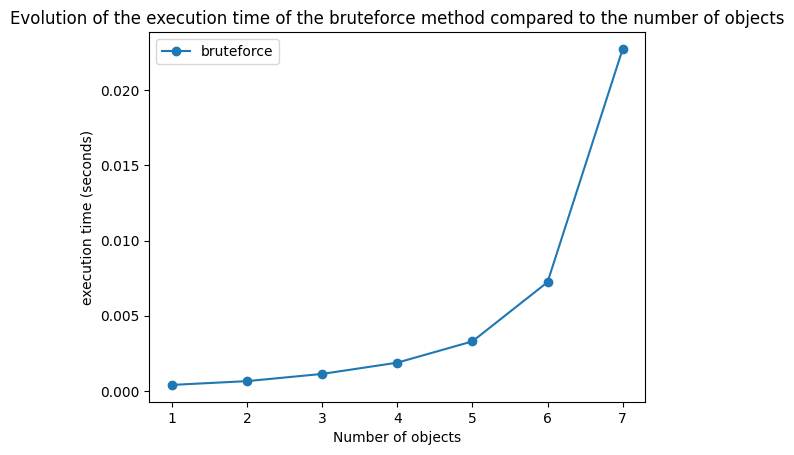

In [3]:
plt.plot(list(range(1, len(executions_time) + 1)), list(map(lambda x: x["bruteforce"], executions_time)), 'o-', label='bruteforce')
plt.legend()
plt.xlabel('Number of objects')
plt.ylabel('execution time (seconds)')
plt.title('Evolution of the execution time of the bruteforce method compared to the number of objects')
plt.show()

We notice that the duration of the bruteforce method evolves in an exponential way.

Graphic representation of the pymoo's method :

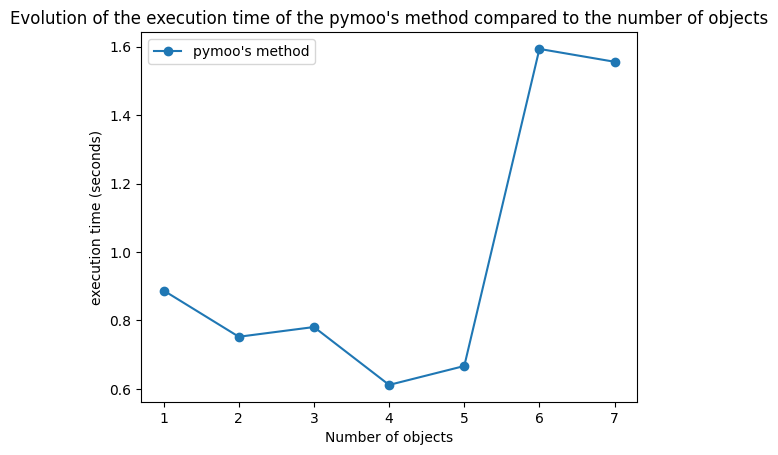

In [4]:
plt.plot(list(range(1, len(executions_time) + 1)), list(map(lambda x: x["pymoo"], executions_time)), 'o-', label="pymoo's method")
plt.legend()
plt.xlabel('Number of objects')
plt.ylabel('execution time (seconds)')
plt.title("Evolution of the execution time of the pymoo's method compared to the number of objects")
plt.show()

Graphic representation of the greedy method :

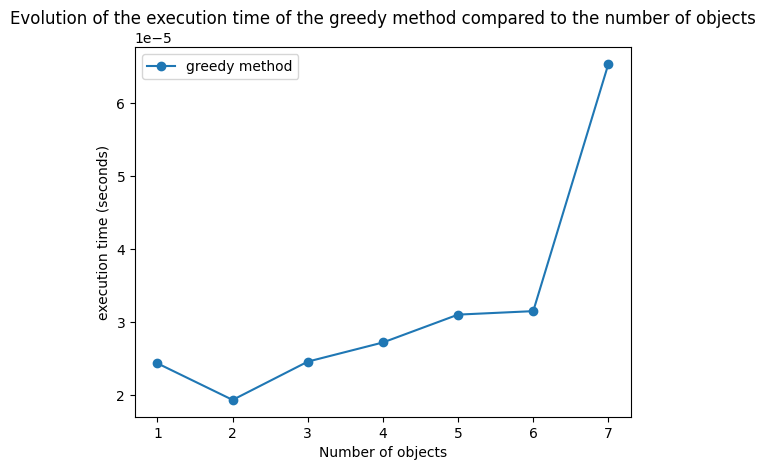

In [5]:
plt.plot(list(range(1, len(executions_time) + 1)), list(map(lambda x: x["greedy"], executions_time)), 'o-', label="greedy method")
plt.legend()
plt.xlabel('Number of objects')
plt.ylabel('execution time (seconds)')
plt.title("Evolution of the execution time of the greedy method compared to the number of objects")
plt.show()